In [13]:
import cv2
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import *
import easygui
import os

In [14]:
top = tk.Tk()
top.geometry("500x500")
top.title("Cartoon Filter")
top.configure(background="white")
label = Label(top, background='#CDCDCD', font=("Arial Bold", 20))

In [15]:
def upload():
    ImagePath = easygui.fileopenbox()
    cartoonify(ImagePath)

In [16]:
def cartoonify(ImagePath):
    # read the image
    orignalImage = cv2.imread(ImagePath)
    orignalImage = cv2.cvtColor(orignalImage, cv2.COLOR_BGR2RGB)

    if orignalImage is None:
        print("Invalid Image")
        return

    ReSized1 = cv2.resize(orignalImage, (960, 540))
    
    # converting an image to grayscale
    grayScaleImage = cv2.cvtColor(orignalImage, cv2.COLOR_RGB2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 540))

    # applying median blur to smooth out the image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))

    # retireving the edges of the cartoon effect by using threshold technique
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 9)
    
    Resized4 = cv2.resize(getEdge, (960, 540))

    #applying bilateral filer to remove noise and keep tje edge sharp as required
    colorImage = cv2.bilateralFilter(orignalImage, 9, 300, 300)
    Resized5 = cv2.resize(colorImage, (960, 540))

    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
    Resized6 = cv2.resize(cartoonImage, (960, 540))

    # Plotting the whole Transition
    images = [ReSized1, ReSized2, ReSized3, Resized4, Resized5, Resized6]

    fig, axes = plt.subplots(3, 2, figsize=(8, 8), subplot_kw={'xticks': [], 'yticks': []}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
    
    save1 = Button(top, text="Save", command=lambda:save(Resized6, ImagePath), padx=30, pady=5)
    save1.configure(background="#364156", foreground="white", font=("Arial", 10, "bold"))
    save1.pack(side=TOP, pady=50)

    plt.show()

In [17]:
def save(Resized6, ImagePath):
    # saving an image using imwrite()
    newName = "Cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension = os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName + extension)
    cv2.imwrite(path, cv2.cvtColor(Resized6, cv2.COLOR_RGB2BGR))
    I = "Image Saved by name" + newName + "at" + path
    tk.MessageBox.showinfo(title=None, message=I)

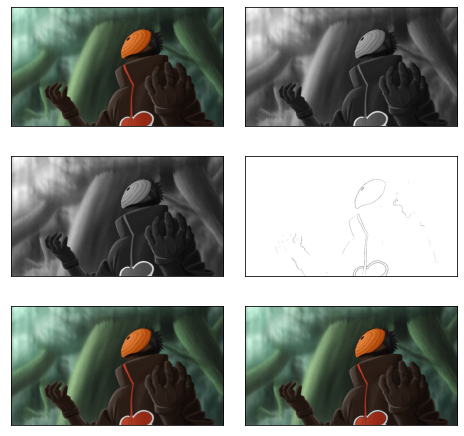

In [18]:
upload = Button(top, text="Apply filter on any Image", command=upload, padx = 10, pady=5)
upload.configure(background="#364156", foreground="white", font=("Arial", 10, "bold"))
upload.pack(side=TOP, pady=50)


top.mainloop()